# Shallow Neural Network 


## Dependencies

### Numpy
- Command: pip install numpy
- Detailed instruction: https://numpy.org/install/

### CVXOPT
- Command: pip install cvxopt
- Detailed instruction: https://cvxopt.org/install/

## Load dependencies before start

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from cvxopt import matrix as cvxopt_matrix
from cvxopt import solvers as cvxopt_solvers

# Classifier with Shallow Network

References
- code : https://scipython.com/blog/a-shallow-neural-network-for-simple-nonlinear-classification/
- description : https://towardsdatascience.com/shallow-neural-networks-23594aa97a5

> ![picture](https://drive.google.com/uc?export=view&id=15GSRoRX5U-suDgPzxtrQHsvRESm9K_KJ)





## 1. Load Data

#### Colab users need to upload the given datasets first

In [2]:
data = np.loadtxt('./data/data.txt')

## 2. Define Hyperparameters and Variables


[[0.50873 0.96767 0.72096 ... 0.81581 0.61815 0.96602]
 [0.0849  0.96752 0.90628 ... 0.68169 0.58699 0.37242]]
[[1. 1. 1. ... 1. 0. 1.]]
m 2506


(0.0, 1.0)

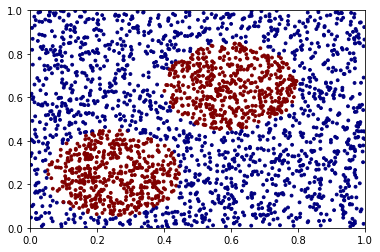

In [3]:
### Hyperparameters

# Training rate.
alpha = 2

# Number of hidden layer units.
num_h = 10

# Number of output units.
num_o = 1

### Variables

X, Y = data[:,:2].T, data[:,2][None, :]

# Number of feature vector components
num_x = X.shape[0]
print(X)

# Number of training examples.
m = X.shape[1]
print(Y)
print('m', m)

# Plot dataset
plt.scatter(X[0, :], X[1, :], c=-Y, cmap='jet', s=8)
plt.xlim(0,1)
plt.ylim(0,1)


## 3. Define a Plot Function

In [4]:
def plot_nn(X, y, params):
    """Plot the decision boundary for prediction trained on X, y."""

    # Set min and max values and give it some padding.
    x_min, x_max = X[0, :].min() - 0.1, X[0, :].max() + 0.1
    y_min, y_max = X[1, :].min() - 0.1, X[1, :].max() + 0.1
    h = 0.01
    # Generate a meshgrid of points with orthogonal spacing.
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Prediction of the classified values across the whole grid.
    Z = np.round(predictions(np.c_[xx.ravel(), yy.ravel()].T, *params)[-1])
    Z = Z.reshape(xx.shape)
    # Plot the decision boundary as a contour plot and training examples.
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[0, :], X[1, :], c=-y, cmap='jet', s=8)
    plt.ylabel('x2')
    plt.xlabel('x1')

## 4. Initialize Parameters

In [5]:
def initialize_params():
    """Randomly initialize the W coefficients, initialize the biases to zero."""
    W1 = np.random.randn(num_h, num_x) * 0.01
    b1 = np.zeros((num_h, 1))
    W2 = np.random.randn(num_o, num_h) * 0.01
    b2 = np.zeros((num_o, 1))
    return W1, b1, W2, b2



## 5. Prediction



### 5.1 Basic Neuron
> <img src='https://drive.google.com/uc?export=view&id=1xY--i5DOy4Iau6mpEKQezmEmFU5k1R-6' width=350>

In [6]:
# Activation function for the hidden layer: hyperbolic tan.
g1 = np.tanh
# Activation function for the output layer: logistic function.
def g2(Z):
    return 1 / (1 + np.exp(-Z))

### 5.2 Forward Propagation
> <img src='https://drive.google.com/uc?export=view&id=1Lv8r4dcovtHSWietp9h4W9xe4sXAVexM' width=250>

In [7]:
def predictions(X, W1, b1, W2, b2):
    """
    Return the predictions, A2 (and various intermediate quantities for
    caching) for the parameters W1, b1, W2, b2 on the input matrix, X.
    """

    Z1 = W1 @ X + b1
    A1 = g1(Z1)
    Z2 = W2 @ A1 + b2
    A2 = g2(Z2)
    return Z1, A1, Z2, A2

### 5.3 Backward Propagation (TODO)
- Cross entropy loss
> <img src='https://drive.google.com/uc?export=view&id=1vgKgSx6O9B2jkUEwLcZnE3_hCVhFozfR' width=400>

- Error Backpropagate with chain rule
> <img src='https://drive.google.com/uc?export=view&id=1rbABpo6Zp2Gxn7Hkt8f4GQMd4C8iPm1M' width=600>

In [8]:
def cost(Yhat, Y):
    """Evaluate and return the cost function J(Yhat, Y)."""
    return -np.sum(Y * np.log(Yhat) + (1 - Y) * np.log(1 - Yhat)) / m

def backprop(A1, Z1, A2, Z2, W1, b1, W2, b2):
    """Backpropagation to update the fit parameters."""

    # The derivatives of the cost function with respect to the various
    # quantities, dJ/dQ are assigned to variables named dQ.

    # For g2 (sigmoid logistic function)
    dZ2 = A2 - Y
    dW2 = (dZ2 @ A1.T) / m
    db2 = dZ2  @ (np.ones((m,1)) / m) 
    # For g1 (tanh activation function)
    dZ1 = (W2.T @ dZ2) * (1- g1(Z1)*g1(Z1))
  
    dW1 = (dZ1 @ X.T) / m
    db1 = dZ1 @ (np.ones((m,1)) / m)
    
    W1 -= dW1 * alpha
    b1 -= db1 * alpha
    W2 -= dW2 * alpha
    b2 -= db2 * alpha
    return W1, b1, W2, b2

## 5. Train the Model

0: J = 0.6931504050847986


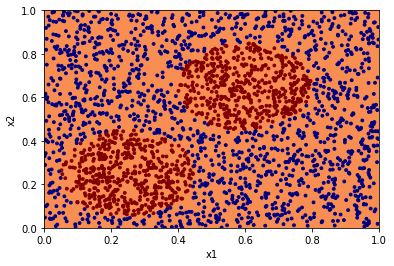

100: J = 0.6544057897369425
200: J = 0.6539978597980284
300: J = 0.6539536254589441
400: J = 0.6538928305284664
500: J = 0.6537763219528705
600: J = 0.653524376456744
700: J = 0.6522008048330648
800: J = 0.5653922966477756
900: J = 0.49020866934262053
1000: J = 0.3779296319170371


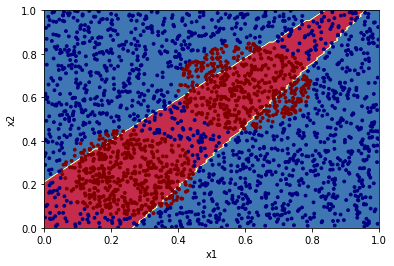

1100: J = 0.3514249299965999
1200: J = 0.3462586531039687
1300: J = 0.3494668738636005
1400: J = 0.3455498247626066
1500: J = 0.3364616816226916
1600: J = 0.3112324221670678
1700: J = 0.2906325744942195
1800: J = 0.27997299706393874
1900: J = 0.27166538590929257
2000: J = 0.26615352580766366


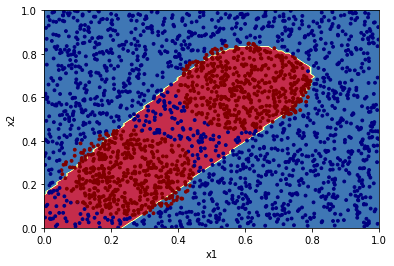

2100: J = 0.2620122982727022
2200: J = 0.2584566999255857
2300: J = 0.25530496519837437
2400: J = 0.25237217140259405
2500: J = 0.24927422879336547
2600: J = 0.2453067965930978
2700: J = 0.23972816037762826
2800: J = 0.23250703783600488
2900: J = 0.2247252504831728
3000: J = 0.21807124086765184


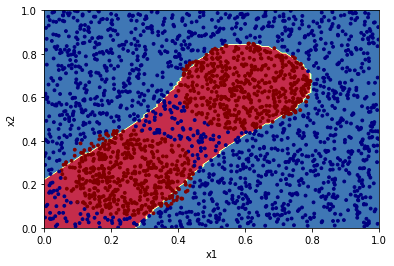

3100: J = 0.21317342903892733
3200: J = 0.20839436535834996
3300: J = 0.203465820828119
3400: J = 0.19890747836755968
3500: J = 0.19480852772054774
3600: J = 0.19113769173659642
3700: J = 0.18799542871105762
3800: J = 0.18608085802317229
3900: J = 0.18584790718968544
4000: J = 0.18542419578982555


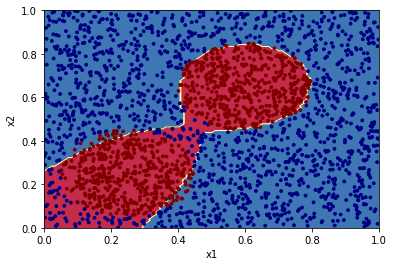

4100: J = 0.17944549293514941
4200: J = 0.163408141587273
4300: J = 0.12515324749594944
4400: J = 0.09172495077678279
4500: J = 0.07637629755920894
4600: J = 0.06819162206879101
4700: J = 0.06271052988918512
4800: J = 0.058681134196603126
4900: J = 0.05556807648306449
5000: J = 0.053073639815298855


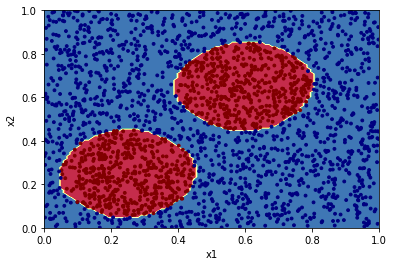

5100: J = 0.05101615266810267
5200: J = 0.04927835004759976
5300: J = 0.047792795391210875
5400: J = 0.048627510755608616
5500: J = 0.05969250969950116
5600: J = 0.0503856309377431
5700: J = 0.05015820521818609
5800: J = 0.04955993049441562
5900: J = 0.04861915022483031
6000: J = 0.04811260323757503


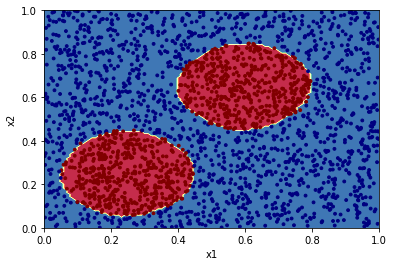

6100: J = 0.047664213872297474
6200: J = 0.04720474968307765
6300: J = 0.04680204426057752
6400: J = 0.046428656996677996
6500: J = 0.04607044386501684
6600: J = 0.04573227826931527
6700: J = 0.045410066331692554
6800: J = 0.04510024407117532
6900: J = 0.04480243911567432


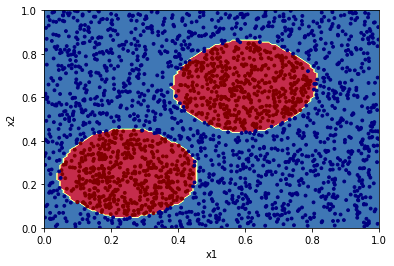

In [9]:
def train(X, Y, max_it):
    """Train the neural network on the features X classified as Y."""
    W1, b1, W2, b2 = initialize_params()

    for it in range(max_it):
        Z1, A1, Z2, A2 = predictions(X, W1, b1, W2, b2)
     
        J = cost(A2, Y)
        W1, b1, W2, b2 = backprop(A1, Z1, A2, Z2, W1, b1, W2, b2)
        if not it % 100:
            # Provide an update on the progress we have made so far.
            print('{}: J = {}'.format(it, J))
            
            # Plot decision boundary
            if not it % 1000:
              plt.clf()
              plot_nn(X, Y, (W1, b1, W2, b2))
              plt.xlim(0,1)
              plt.ylim(0,1)
              plt.show()

    return W1, b1, W2, b2

W1, b1, W2, b2 = train(X, Y, 7000)

plot_nn(X, Y, (W1, b1, W2, b2))
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()